<center>
    
# Email Spam/Ham Classification 
---------
</center>
<img src="https://raw.githubusercontent.com/deepankarkotnala/Email-Spam-Ham-Classifier-NLP/master/images/email_spam_ham.png"  width="900" align="left"/>


-------
### Read Text and Clean It

In [1]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("EmailSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using RandomForestClassifier

In [2]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [5]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06252411983833074, 'body_len'),
 (0.03125513945783822, 1803),
 (0.030360261713604005, 4796),
 (0.030044902550180903, 7350),
 (0.028863405297834696, 2031),
 (0.01916938136001426, 7218),
 (0.01880799250508356, 2171),
 (0.017729686201174863, 6746),
 (0.017619385274942702, 1361),
 (0.015879789157478712, 7461)]

In [6]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

` # pos_label : we need to tell it what our POSITIVE label is. `

` # We are predicting spam here, so we will tell it that SPAM is positive label.`

In [7]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.565 / Accuracy: 0.943


In [8]:
def generate_cf_mat_and_heatmap(model,x,y):
    
    model_string = str(model)
    print(' '.join(model_string.split('(')[:1])) # Extracting the model name from the model summary
    print('-----------------------------------------')
    
    pred = model.predict(x)
    
    cm = confusion_matrix(y, pred)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, cmap='YlGnBu') # cmap -- Y low, G neutral, B upper , maybe
    
    acc = accuracy_score(y, pred)
    p_score = precision_score(y, pred, average='weighted')
    r_score = recall_score(y, pred, average='weighted')
    f_score = f1_score(y, pred, average='weighted')
    
    max_len = 14
    print('Accuracy'.ljust(10),':', acc)
    print('Precision'.ljust(10),':', p_score)
    print('Recall'.ljust(10),':', r_score)
    print('F1_Score'.ljust(10),':',f_score)
    print('-----------------------------------------')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, recall_score, precision_score, f1_score

RandomForestClassifier
-----------------------------------------
Accuracy   : 0.9425493716337523
Precision  : 0.946115657002753
Recall     : 0.9425493716337523
F1_Score   : 0.9354763709146661
-----------------------------------------


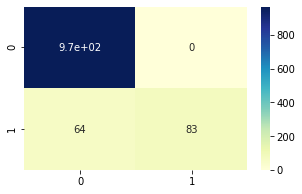

In [10]:
generate_cf_mat_and_heatmap(rf_model, X_test, y_test)